In [1]:
from solver.jps import JPS
from solver.astar import AStar

from utils.distance import diagonalDistance
from solver.base import findPathBase
from solver.pruning.bbox import BBoxPruning
from solver.pruning.base import NoPruning

from container.open import OpenList
from container.closed import ClosedList

from evaluation.test import simpleTest

from graph.grid import Map
from graph.node import Node

In [2]:
height = 15
width = 30
mapstr = '''

. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 7
jStart = 1
iGoal = 13
jGoal = 28

In [3]:
startNode = Node(iStart, jStart, 0)
goalNode = Node(iGoal, jGoal, 0)
grid = Map().readFromString(mapstr, width, height)

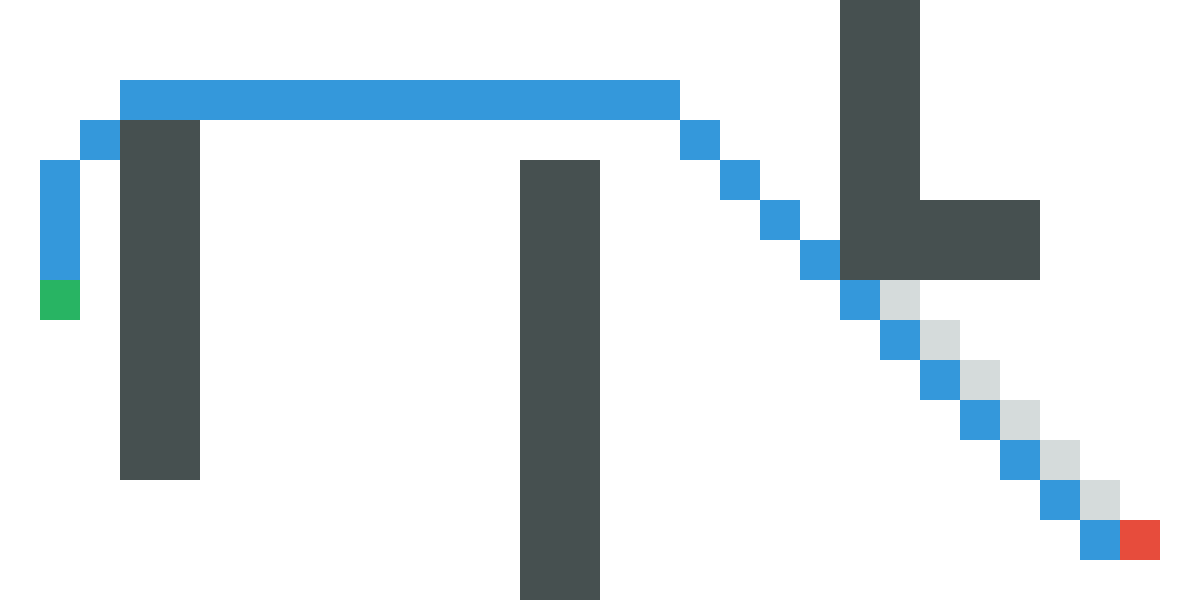

{'time': 0.0006048679351806641,
 'found': True,
 'length': 35.38477631085024,
 'created': 37}

In [4]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

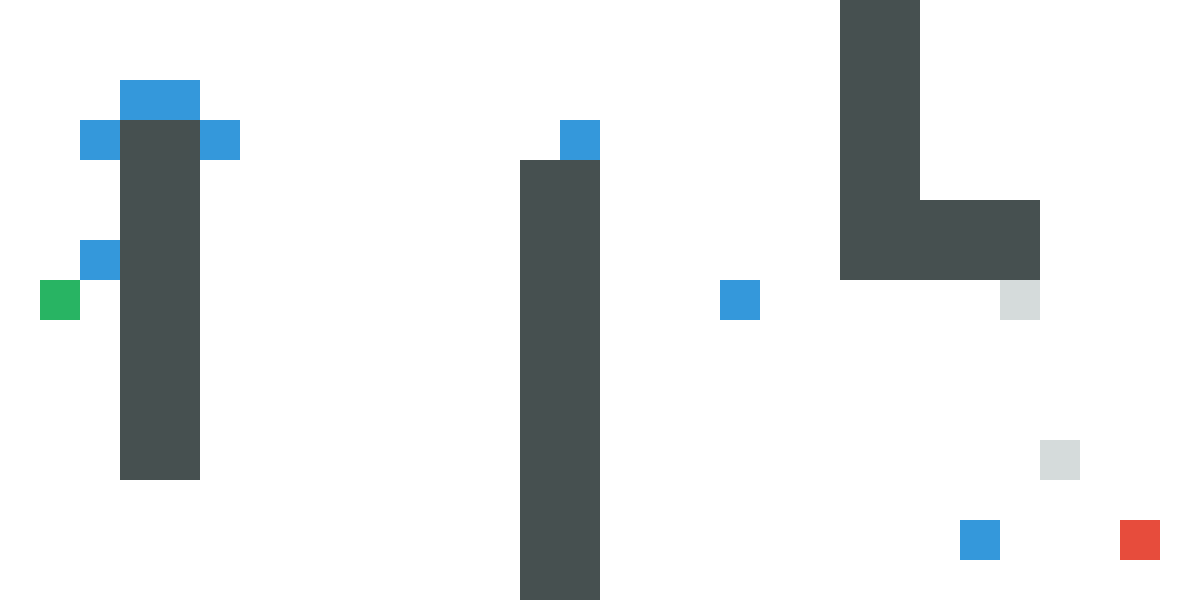

{'time': 0.0023381710052490234,
 'found': True,
 'length': 35.384776310850235,
 'created': 12}

In [5]:
solver = JPS(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

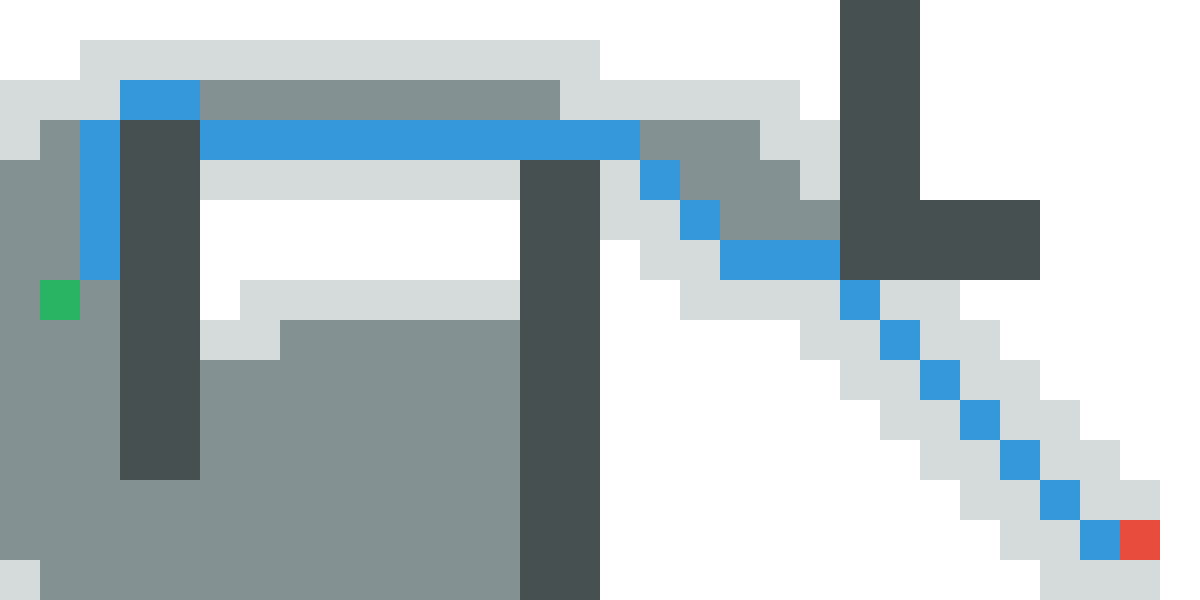

{'time': 0.006566762924194336,
 'found': True,
 'length': 35.384776310850235,
 'created': 218}

In [6]:
prune = NoPruning()
solver = AStar(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

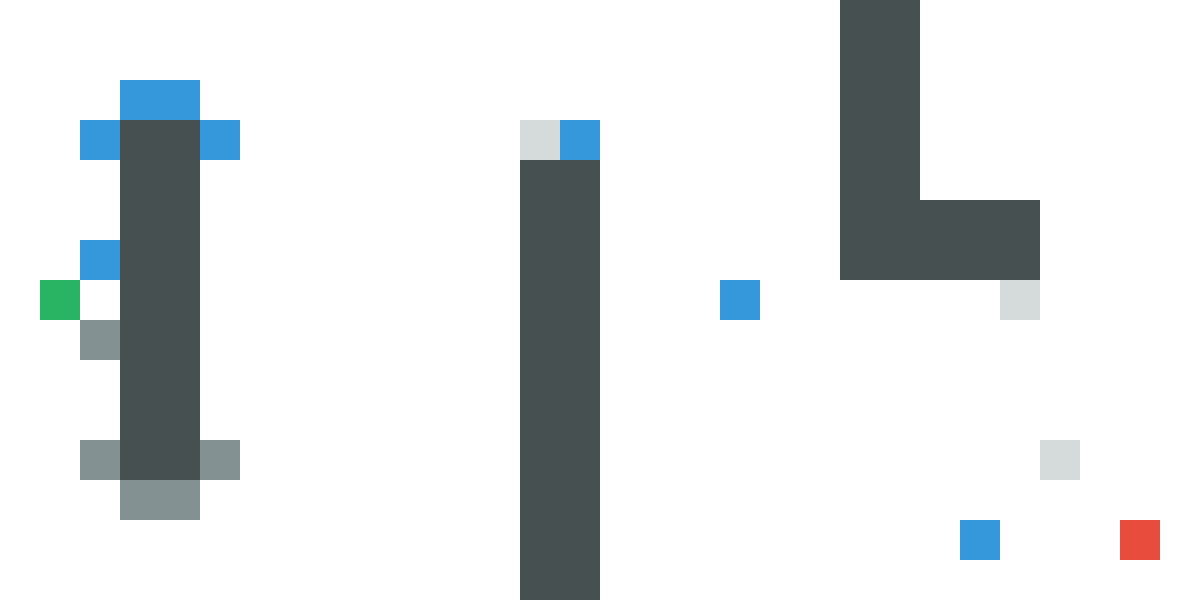

{'time': 0.003650188446044922,
 'found': True,
 'length': 35.384776310850235,
 'created': 18}

In [7]:
prune = NoPruning()
solver = JPS(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

In [9]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # . # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 6
jGoal = 24

In [10]:
startNode = Node(iStart, jStart, 0)
goalNode = Node(iGoal, jGoal, 0)
grid = Map().readFromString(mapstr, width, height)

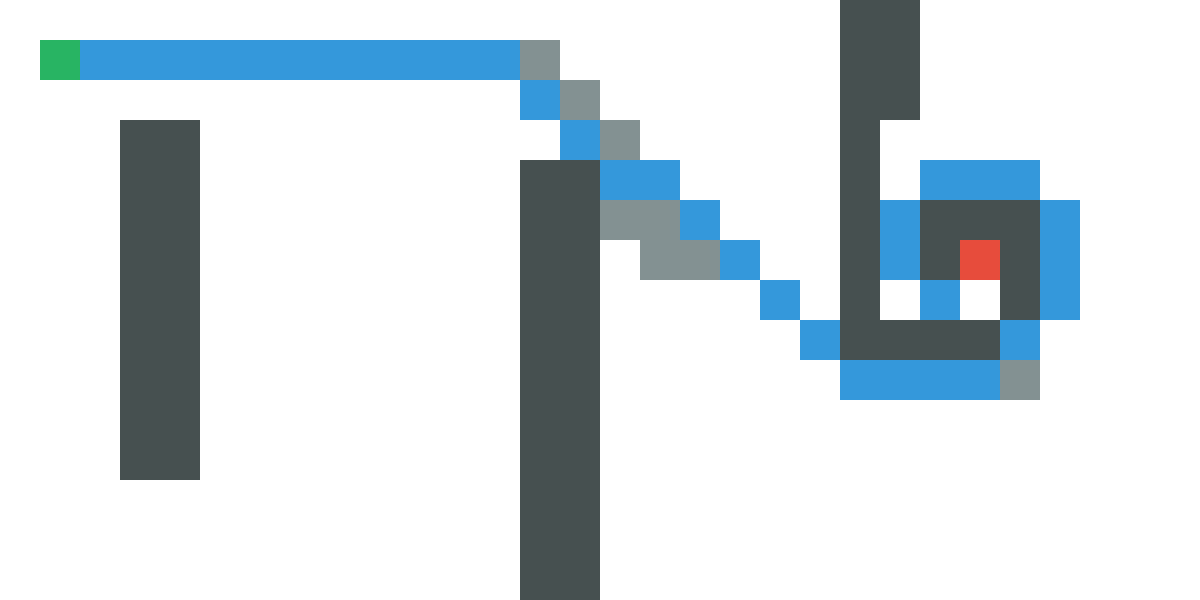

{'time': 0.0009737014770507812,
 'found': True,
 'length': 39.79898987322333,
 'created': 43}

In [11]:
prune = BBoxPruning()
solver = AStar(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

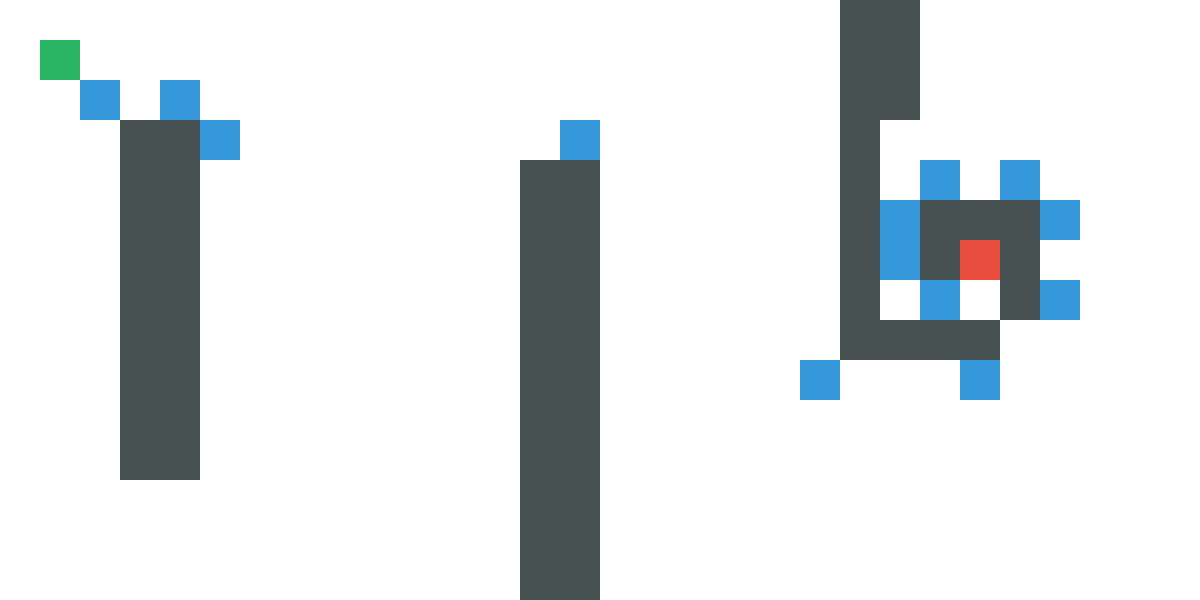

{'time': 0.0026197433471679688,
 'found': True,
 'length': 39.79898987322332,
 'created': 15}

In [12]:
solver = JPS(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

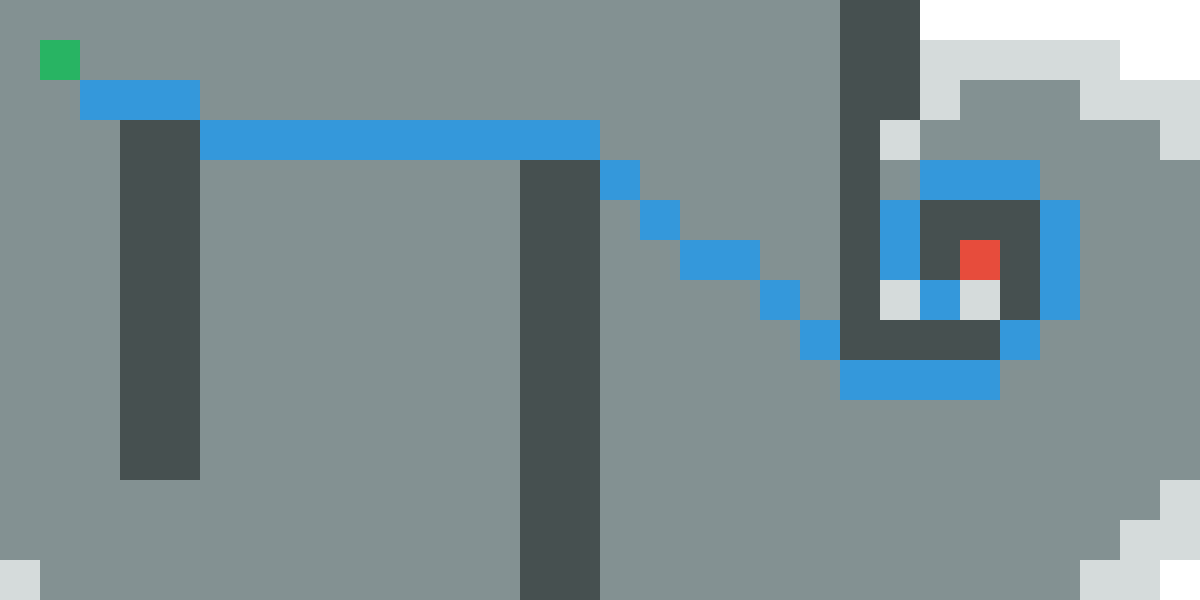

{'time': 0.015810012817382812,
 'found': True,
 'length': 39.79898987322333,
 'created': 379}

In [13]:
prune = NoPruning()
solver = AStar(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)

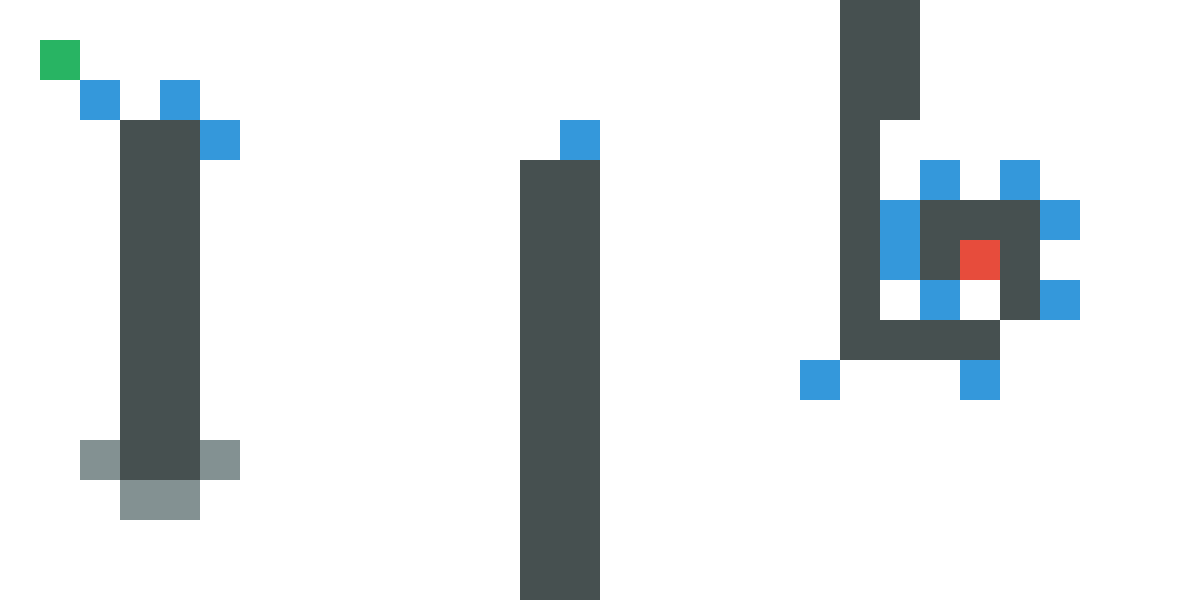

{'time': 0.003632068634033203,
 'found': True,
 'length': 39.79898987322332,
 'created': 19}

In [14]:
prune = NoPruning()
solver = JPS(diagonalDistance, prune)
prune.preprocess(solver.getForsedDirections, grid)
simpleTest(solver, prune, findPathBase, grid, startNode, goalNode, OpenList, ClosedList)